# Correct vs wrong distributions

In this NB I plot:
    
- A comparison between correctly predicted pt's and wrongly predicted pt's of ttH
- The same for the mass of the Higgs (it's the worst reconstructed out of ttH)
- Correctly vs wrongly predicted pt's of b1 and b2 of the Higgs


## Initialise

In [1]:
import h5py
import awkward as ak
import vector
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
from matplotlib.colors import LogNorm
hep.style.use(hep.style.ROOT)
mpl.rcParams['figure.dpi'] = 50
vector.register_awkward()

In [2]:
df = h5py.File('./SPANet/predictions/0405_output_v49_matched.h5','r')
df_input = h5py.File('./SPANet/data/tth_matched_3.h5','r')
fields = ['pt','eta','phi','btag']
jets = ak.zip({
    f: df["INPUTS"]["Source"][f][()] for f in fields
}, with_name="Momentum4D")
jets["m"] = np.zeros_like(jets.pt)
jets[0].tolist()

[{'pt': 141.5,
  'eta': 1.500244140625,
  'phi': 1.181396484375,
  'btag': 0.006282806396484375,
  'm': 0.0},
 {'pt': 126.0,
  'eta': 2.365234375,
  'phi': -2.8564453125,
  'btag': 0.99609375,
  'm': 0.0},
 {'pt': 123.8125,
  'eta': 1.673828125,
  'phi': 0.4423828125,
  'btag': 0.006175994873046875,
  'm': 0.0},
 {'pt': 102.4375,
  'eta': 1.1171875,
  'phi': -0.8157958984375,
  'btag': 0.99951171875,
  'm': 0.0},
 {'pt': 84.375,
  'eta': 2.15576171875,
  'phi': 1.50146484375,
  'btag': 0.19140625,
  'm': 0.0},
 {'pt': 42.5625,
  'eta': 0.723876953125,
  'phi': 3.0244140625,
  'btag': 0.998046875,
  'm': 0.0},
 {'pt': 0.0, 'eta': 0.0, 'phi': 0.0, 'btag': 0.0, 'm': 0.0},
 {'pt': 0.0, 'eta': 0.0, 'phi': 0.0, 'btag': 0.0, 'm': 0.0},
 {'pt': 0.0, 'eta': 0.0, 'phi': 0.0, 'btag': 0.0, 'm': 0.0},
 {'pt': 0.0, 'eta': 0.0, 'phi': 0.0, 'btag': 0.0, 'm': 0.0},
 {'pt': 0.0, 'eta': 0.0, 'phi': 0.0, 'btag': 0.0, 'm': 0.0},
 {'pt': 0.0, 'eta': 0.0, 'phi': 0.0, 'btag': 0.0, 'm': 0.0},
 {'pt': 0.0, 'eta

In [3]:
# Higgs jets
H_b1_true = ak.Array(df_input["TARGETS"]["h"]["b1"][()])
H_b2_true = ak.Array(df_input["TARGETS"]["h"]["b2"][()])

H_b1_true = ak.unflatten(H_b1_true, ak.ones_like(H_b1_true))
H_b2_true = ak.unflatten(H_b2_true, ak.ones_like(H_b2_true))

higgs_index_true = ak.concatenate((H_b1_true, H_b2_true), axis=1)
higgs_jet_true = jets[higgs_index_true]

H_b1_pred = ak.Array(df["TARGETS"]["h"]["b1"][()])
H_b2_pred = ak.Array(df["TARGETS"]["h"]["b2"][()])

H_b1_pred = ak.unflatten(H_b1_pred, ak.ones_like(H_b1_pred))
H_b2_pred = ak.unflatten(H_b2_pred, ak.ones_like(H_b2_pred))

higgs_index_pred = ak.concatenate((H_b1_pred, H_b2_pred), axis=1)
higgs_jet_pred = jets[higgs_index_pred]

# Hadronic top jets
t1_q1_pred = ak.Array(df["TARGETS"]["t1"]["q1"][()])
t1_q2_pred = ak.Array(df["TARGETS"]["t1"]["q2"][()])
t1_b_pred = ak.Array(df["TARGETS"]["t1"]["b"][()])

t1_q1_pred = ak.unflatten(t1_q1_pred, ak.ones_like(t1_q1_pred))
t1_q2_pred = ak.unflatten(t1_q2_pred, ak.ones_like(t1_q2_pred))
t1_b_pred = ak.unflatten(t1_b_pred, ak.ones_like(t1_b_pred))

hadtop_index_pred = ak.concatenate((t1_q1_pred, t1_q2_pred, t1_b_pred), axis=1)
hadtop_jet_pred = jets[hadtop_index_pred]

t1_q1_true = ak.Array(df_input["TARGETS"]["t1"]["q1"][()])
t1_q2_true = ak.Array(df_input["TARGETS"]["t1"]["q2"][()])
t1_b_true = ak.Array(df_input["TARGETS"]["t1"]["b"][()])

t1_q1_true = ak.unflatten(t1_q1_true, ak.ones_like(t1_q1_true))
t1_q2_true = ak.unflatten(t1_q2_true, ak.ones_like(t1_q2_true))
t1_b_true = ak.unflatten(t1_b_true, ak.ones_like(t1_b_true))

hadtop_index_true = ak.concatenate((t1_q1_true, t1_q2_true, t1_b_true), axis=1)
hadtop_jet_true = jets[hadtop_index_true]

# Leptonic top jets
t2_b_pred = ak.Array(df["TARGETS"]["t2"]["b"][()])
t2_b_pred = ak.unflatten(t2_b_pred, ak.ones_like(t2_b_pred))

leptop_index_pred = t2_b_pred
leptop_jet_pred = jets[leptop_index_pred]

t2_b_true = ak.Array(df_input["TARGETS"]["t2"]["b"][()])
t2_b_true = ak.unflatten(t2_b_true, ak.ones_like(t2_b_true))

leptop_index_true = t2_b_true
leptop_jet_true = jets[leptop_index_true]

## Correct vs wrong pt distributions

### Leptonic top

In [4]:
mask = (leptop_jet_true == leptop_jet_pred)
leptop_pred_correct = leptop_jet_pred[mask] # correctly predicted jets
leptop_pred_wrong = leptop_jet_pred[~mask] # wrongly predicted jets

# Drop empty arrays
leptop_pred_correct = leptop_pred_correct[ak.num(leptop_pred_correct)>0]
leptop_pred_wrong = leptop_pred_wrong[ak.num(leptop_pred_wrong)>0]

In [5]:
print(f"Number of correctly predicted is {len(leptop_pred_correct)}")
print(f"Number of wrongly predicted is {len(leptop_pred_wrong)}")

Number of correctly predicted is 42673
Number of wrongly predicted is 25203


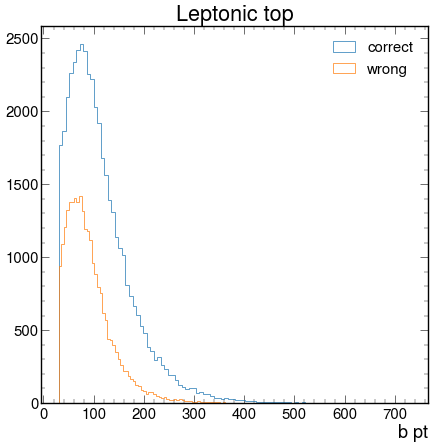

In [6]:
plt.hist(leptop_pred_correct[:,0].pt, bins=100, histtype="step")
plt.hist(leptop_pred_wrong[:,0].pt, bins=100, histtype="step")
plt.legend(labels=["correct", "wrong"])
plt.title("Leptonic top")
plt.xlabel("b pt")
plt.show()

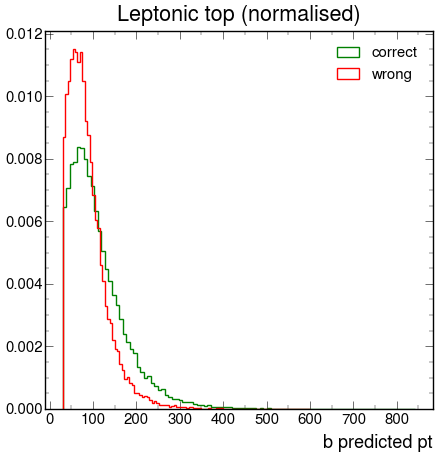

In [10]:
# Normalised by setting density=True
fig, ax = plt.subplots(1, 1)

plt.hist(leptop_pred_correct[:,0].pt, density=True, bins=100, color='g',
         histtype="step", linewidth=2)
plt.hist(leptop_pred_wrong[:,0].pt, density=True, bins=100, color='r',
         histtype="step", linewidth=2)
plt.legend(labels=["correct", "wrong"])
plt.title("Leptonic top (normalised)", pad=15)
plt.xlabel("b predicted pt", labelpad=10)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.002))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.0005))

#plt.show()
plt.rcParams['figure.facecolor'] = 'white'
plt.savefig("./efficiency_plots/t2_corr_vs_wrong_pt.png", transparent=False, dpi=300,
            bbox_inches='tight')

In [ ]:
# Below is for "b true pt" plots

In [8]:
mask = (leptop_jet_true == leptop_jet_pred)
leptop_true_correct = leptop_jet_true[mask] 
leptop_true_wrong = leptop_jet_true[~mask] 

leptop_true_correct = leptop_true_correct[ak.num(leptop_true_correct)>0]
leptop_true_wrong = leptop_true_wrong[ak.num(leptop_true_wrong)>0]

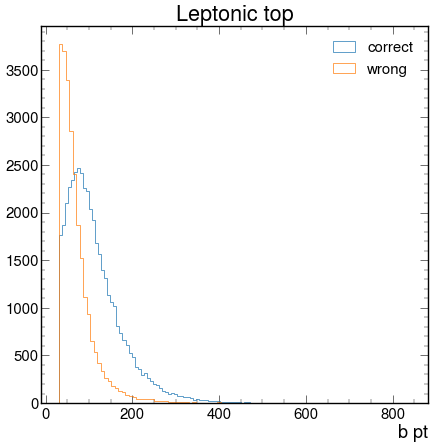

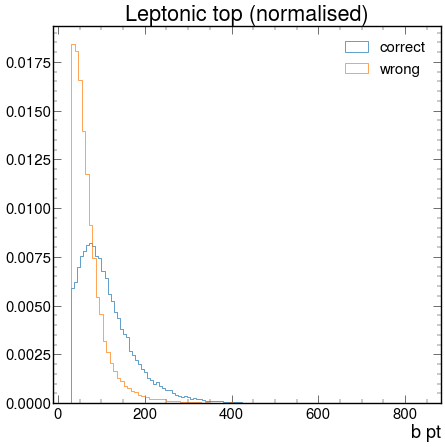

In [9]:
plt.hist(leptop_true_correct[:,0].pt, bins=100, histtype="step")
plt.hist(leptop_true_wrong[:,0].pt, bins=100, histtype="step")
plt.legend(labels=["correct", "wrong"])
plt.title("Leptonic top")
plt.xlabel("b pt")
plt.show()

# Normalised by setting density=True
plt.hist(leptop_true_correct[:,0].pt, density=True, bins=100, histtype="step")
plt.hist(leptop_true_wrong[:,0].pt, density=True, bins=100, histtype="step")
plt.legend(labels=["correct", "wrong"])
plt.title("Leptonic top (normalised)")
plt.xlabel("b pt")
plt.show()

### Hadronic top

In [6]:
mask = (hadtop_jet_true == hadtop_jet_pred)
hadtop_pred_correct = hadtop_jet_pred[mask] 
hadtop_pred_wrong = hadtop_jet_pred[~mask]

hadtop_pred_correct = hadtop_pred_correct[ak.num(hadtop_pred_correct)==3]
hadtop_pred_wrong = hadtop_pred_wrong[ak.num(hadtop_pred_wrong)>0]

hadtop_pred_wrong_3 = hadtop_pred_wrong[ak.num(hadtop_pred_wrong)==3]
hadtop_pred_wrong_2 = hadtop_pred_wrong[ak.num(hadtop_pred_wrong)==2]
hadtop_pred_wrong_1 = hadtop_pred_wrong[ak.num(hadtop_pred_wrong)==1]

In [11]:
print(f"Number of correctly predicted is {len(hadtop_pred_correct)}")
print(f"Number of wrongly predicted is {len(hadtop_pred_wrong)}")

print(f"Number of 3 jets wrongly predicted is {len(hadtop_pred_wrong_3)}")
print(f"Number of 2 jets wrongly predicted is {len(hadtop_pred_wrong_2)}")
print(f"Number of 1 jet wrongly predicted is {len(hadtop_pred_wrong_1)}")
print(len(hadtop_pred_wrong_3)+len(hadtop_pred_wrong_2)+len(hadtop_pred_wrong_1))

Number of correctly predicted is 41014
Number of wrongly predicted is 26862
Number of 3 jets wrongly predicted is 4983
Number of 2 jets wrongly predicted is 7013
Number of 1 jet wrongly predicted is 14866
26862


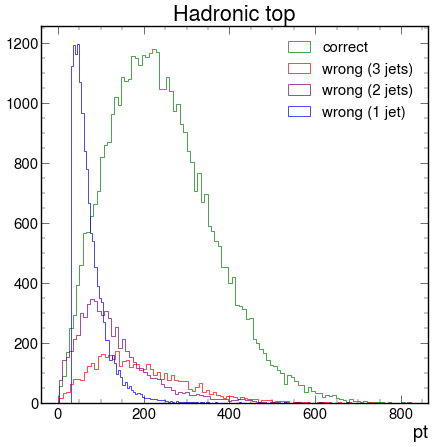

In [8]:
plt.hist((hadtop_pred_correct[:,0] + hadtop_pred_correct[:,1] + hadtop_pred_correct[:,2]).pt,
          bins=100, histtype="step", color='g', linewidth=2)
plt.hist((hadtop_pred_wrong_3[:,0] + hadtop_pred_wrong_3[:,1] + hadtop_pred_wrong_3[:,2]).pt,
         bins=100, histtype="step", color='r', linewidth=2)
plt.hist((hadtop_pred_wrong_2[:,0] + hadtop_pred_wrong_2[:,1]).pt,
         bins=100, histtype="step", color='purple', linewidth=2)
plt.hist((hadtop_pred_wrong_1[:,0]).pt,
         bins=100, histtype="step", color='b', linewidth=2)
plt.legend(labels=["correct", "wrong (3 jets)", "wrong (2 jets)", "wrong (1 jet)"])
plt.title("Hadronic top")
plt.xlabel("pt")
plt.show()

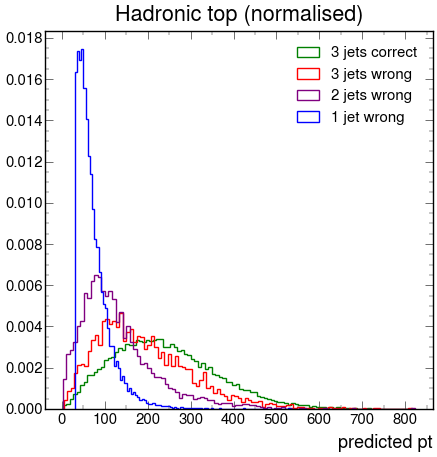

In [9]:
# Normalised by setting density=True
fig, ax = plt.subplots(1, 1)

hadtop_pred_wrong_3 = hadtop_pred_wrong[ak.num(hadtop_pred_wrong)==3]
hadtop_pred_wrong_2 = hadtop_pred_wrong[ak.num(hadtop_pred_wrong)==2]
hadtop_pred_wrong_1 = hadtop_pred_wrong[ak.num(hadtop_pred_wrong)==1]

plt.hist((hadtop_pred_correct[:,0] + hadtop_pred_correct[:,1] + hadtop_pred_correct[:,2]).pt,
          bins=100, histtype="step", density=True, color='g', linewidth=2)
plt.hist((hadtop_pred_wrong_3[:,0] + hadtop_pred_wrong_3[:,1] + hadtop_pred_wrong_3[:,2]).pt,
         bins=100, histtype="step", density=True, color='r', linewidth=2)
plt.hist((hadtop_pred_wrong_2[:,0] + hadtop_pred_wrong_2[:,1]).pt,
         bins=100, histtype="step", density=True, color='purple', linewidth=2)
plt.hist((hadtop_pred_wrong_1[:,0]).pt,
         bins=100, histtype="step", density=True, color='b', linewidth=2)

plt.legend(labels=["3 jets correct", "3 jets wrong", "2 jets wrong", "1 jet wrong"])
plt.title("Hadronic top (normalised)", pad=15)
plt.xlabel("predicted pt", labelpad=10)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.002))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.0005))

#plt.show()
plt.rcParams['figure.facecolor'] = 'white'
plt.savefig("./efficiency_plots/t1_corr_vs_wrong_pt.png", transparent=False, dpi=300,
            bbox_inches='tight')

In [ ]:
# Below is for "true pt" plots

In [14]:
mask = (hadtop_jet_true == hadtop_jet_pred)
hadtop_true_correct = hadtop_jet_true[mask] 
hadtop_true_wrong = hadtop_jet_true[~mask]

hadtop_true_correct = hadtop_true_correct[ak.num(hadtop_true_correct)==3]
hadtop_true_wrong = hadtop_true_wrong[ak.num(hadtop_true_wrong)>0]

hadtop_true_wrong_3 = hadtop_true_wrong[ak.num(hadtop_true_wrong)==3]
hadtop_true_wrong_2 = hadtop_true_wrong[ak.num(hadtop_true_wrong)==2]
hadtop_true_wrong_1 = hadtop_true_wrong[ak.num(hadtop_true_wrong)==1]

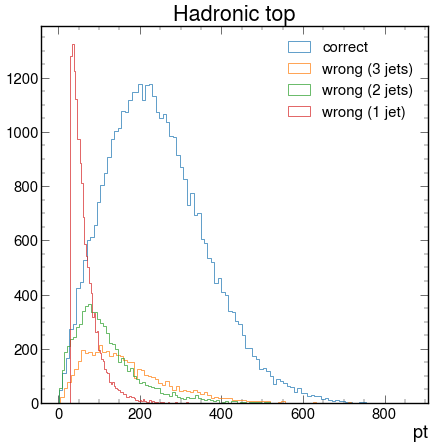

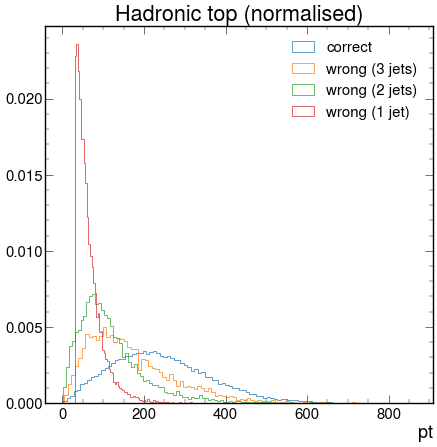

In [15]:
plt.hist((hadtop_true_correct[:,0] + hadtop_true_correct[:,1] + hadtop_true_correct[:,2]).pt,
          bins=100, histtype="step")
plt.hist((hadtop_true_wrong_3[:,0] + hadtop_true_wrong_3[:,1] + hadtop_true_wrong_3[:,2]).pt,
         bins=100, histtype="step")
plt.hist((hadtop_true_wrong_2[:,0] + hadtop_true_wrong_2[:,1]).pt,
         bins=100, histtype="step")
plt.hist((hadtop_true_wrong_1[:,0]).pt,
         bins=100, histtype="step")

plt.legend(labels=["correct", "wrong (3 jets)", "wrong (2 jets)", "wrong (1 jet)"])
plt.title("Hadronic top")
plt.xlabel("pt")
plt.show()

# Normalised by setting density=True
plt.hist((hadtop_true_correct[:,0] + hadtop_true_correct[:,1] + hadtop_true_correct[:,2]).pt,
          bins=100, histtype="step", density=True)
plt.hist((hadtop_true_wrong_3[:,0] + hadtop_true_wrong_3[:,1] + hadtop_true_wrong_3[:,2]).pt,
         bins=100, histtype="step", density=True)
plt.hist((hadtop_true_wrong_2[:,0] + hadtop_true_wrong_2[:,1]).pt,
         bins=100, histtype="step", density=True)
plt.hist((hadtop_true_wrong_1[:,0]).pt,
         bins=100, histtype="step", density=True)

plt.legend(labels=["correct", "wrong (3 jets)", "wrong (2 jets)", "wrong (1 jet)"])
plt.title("Hadronic top (normalised)")
plt.xlabel("pt")
plt.show()

### Higgs

In [15]:
mask = (higgs_jet_true == higgs_jet_pred)
higgs_pred_correct = higgs_jet_pred[mask] 
higgs_pred_wrong = higgs_jet_pred[~mask]

higgs_pred_correct = higgs_pred_correct[ak.num(higgs_pred_correct)==2]
higgs_pred_wrong = higgs_pred_wrong[ak.num(higgs_pred_wrong)>0]

higgs_pred_wrong_2 = higgs_pred_wrong[ak.num(higgs_pred_wrong)==2]
higgs_pred_wrong_1 = higgs_pred_wrong[ak.num(higgs_pred_wrong)==1]

In [21]:
print(f"Number of correctly predicted is {len(higgs_pred_correct)}")
print(f"Number of wrongly predicted is {len(higgs_pred_wrong)}")

print(f"Number of 2 jets wrongly predicted is {len(higgs_pred_wrong_2)}")
print(f"Number of 1 jet wrongly predicted is {len(higgs_pred_wrong_1)}")

Number of correctly predicted is 35207
Number of wrongly predicted is 32669
Number of 2 jets wrongly predicted is 14129
Number of 1 jet wrongly predicted is 18540


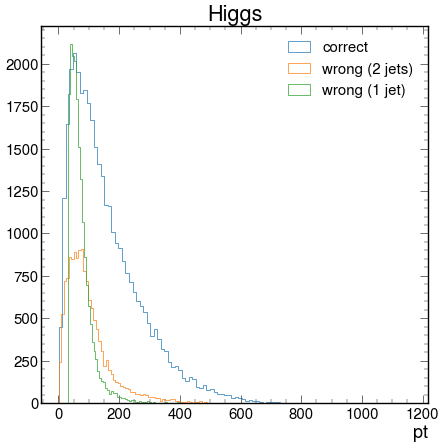

In [18]:
plt.hist((higgs_pred_correct[:,0] + higgs_pred_correct[:,1]).pt,
          bins=100, histtype="step")
plt.hist((higgs_pred_wrong_2[:,0] + higgs_pred_wrong_2[:,1]).pt,
         bins=100, histtype="step")
plt.hist((higgs_pred_wrong_1[:,0]).pt, bins=100, histtype="step")

plt.legend(labels=["correct", "wrong (2 jets)", "wrong (1 jet)"])
plt.title("Higgs")
plt.xlabel("pt")
plt.show()

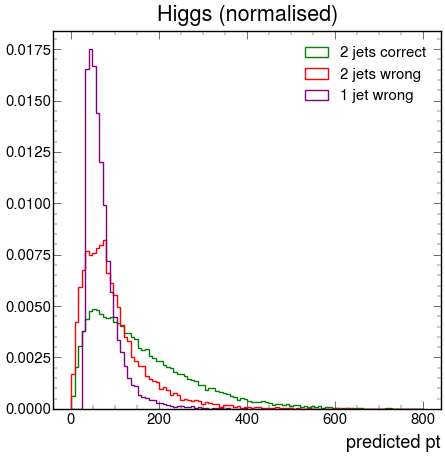

In [12]:
# Normalised with density=True
plt.hist((higgs_pred_correct[:,0] + higgs_pred_correct[:,1]).pt,
          bins=100, histtype="step", density=True, range=(0,800), color='g', linewidth=2)
plt.hist((higgs_pred_wrong_2[:,0] + higgs_pred_wrong_2[:,1]).pt,
         bins=100, histtype="step", density=True, range=(0,800), linewidth=2, color='r')
plt.hist((higgs_pred_wrong_1[:,0]).pt, bins=100, histtype="step",
         density=True, range=(0,800), linewidth=2, color='purple')

plt.legend(labels=["2 jets correct", "2 jets wrong", "1 jet wrong"])
plt.title("Higgs (normalised)", pad=15)
plt.xlabel("predicted pt", labelpad=10)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.002))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.0005))

#plt.show()
plt.rcParams['figure.facecolor'] = 'white'
plt.savefig("./efficiency_plots/h_corr_vs_wrong_pt.png", transparent=False, dpi=300,
            bbox_inches='tight')

In [ ]:
# Below is for "true pt" plots

In [120]:
mask = (higgs_jet_true == higgs_jet_pred)
higgs_true_correct = higgs_jet_true[mask] # correctly assigned jets 
higgs_true_wrong = higgs_jet_true[~mask] # the jets that we were supposed to get but didn't

higgs_true_correct = higgs_true_correct[ak.num(higgs_true_correct)==2]
higgs_true_wrong = higgs_true_wrong[ak.num(higgs_true_wrong)>0]

higgs_true_wrong_2 = higgs_true_wrong[ak.num(higgs_true_wrong)==2]
higgs_true_wrong_1 = higgs_true_wrong[ak.num(higgs_true_wrong)==1]

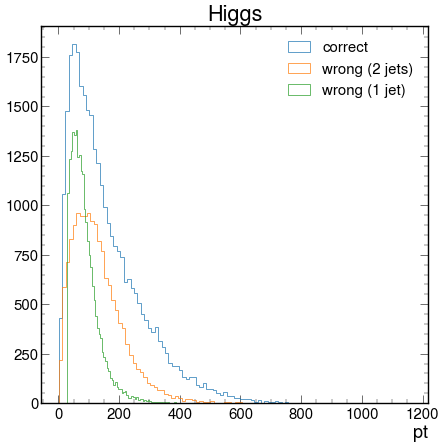

In [155]:
plt.hist((higgs_true_correct[:,0] + higgs_true_correct[:,1]).pt,
          bins=100, histtype="step")
plt.hist((higgs_true_wrong_2[:,0] + higgs_true_wrong_2[:,1]).pt,
         bins=100, histtype="step")
plt.hist((higgs_true_wrong_1[:,0]).pt, bins=100, histtype="step")

plt.legend(labels=["correct", "wrong (2 jets)", "wrong (1 jet)"])
plt.title("Higgs")
plt.xlabel("pt")
plt.show()

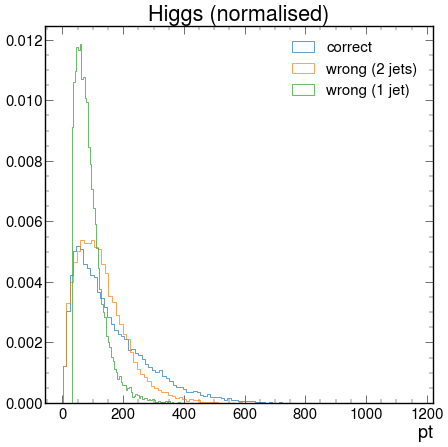

In [153]:
# Normalised with density=True
plt.hist((higgs_true_correct[:,0] + higgs_true_correct[:,1]).pt,
          bins=100, histtype="step", density=True)
plt.hist((higgs_true_wrong_2[:,0] + higgs_true_wrong_2[:,1]).pt,
         bins=100, histtype="step", density=True)
plt.hist((higgs_true_wrong_1[:,0]).pt, bins=100, histtype="step", density=True)

plt.legend(labels=["correct", "wrong (2 jets)", "wrong (1 jet)"])
plt.title("Higgs (normalised)")
plt.xlabel("pt")
plt.show()

## Correct vs wrong Higgs mass

In [ ]:
# Plot Higgs mass by correctly predicted vs wrongly predicted

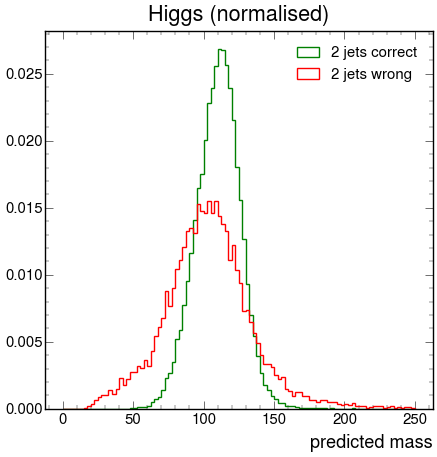

In [20]:
# Normalised with density=True
plt.hist((higgs_pred_correct[:,0] + higgs_pred_correct[:,1]).m,
          bins=100, histtype="step", density=True, range=(0,250), color='g', linewidth=2)

plt.hist((higgs_pred_wrong_2[:,0] + higgs_pred_wrong_2[:,1]).m,
         bins=100, histtype="step", density=True, range=(0,250), linewidth=2, color='r')

plt.legend(labels=["2 jets correct", "2 jets wrong", "1 jet wrong"])
plt.title("Higgs (normalised)", pad=15)
plt.xlabel("predicted mass", labelpad=10)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.002))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.0005))

#plt.show()
plt.rcParams['figure.facecolor'] = 'white'
plt.savefig("./efficiency_plots/h_corr_vs_wrong_mass.png", transparent=False, dpi=300,
            bbox_inches='tight')

In [ ]:
# Plot Higgs mass by predicted vs true

In [24]:
H_b1_true = ak.Array(df_input["TARGETS"]["h"]["b1"][()])
H_b2_true = ak.Array(df_input["TARGETS"]["h"]["b2"][()])

# Trick to make it a var-formatted array with 1 element per row
H_b1_true = ak.unflatten(H_b1_true, ak.ones_like(H_b1_true))
H_b2_true = ak.unflatten(H_b2_true, ak.ones_like(H_b2_true))

higgs_index_true = ak.concatenate((H_b1_true, H_b2_true), axis=1)
higgs_jet_true = jets[higgs_index_true]

H_b1_pred = ak.Array(df["TARGETS"]["h"]["b1"][()])
H_b2_pred = ak.Array(df["TARGETS"]["h"]["b2"][()])

# Trick to make it a var-formatted array with 1 element per row
H_b1_pred = ak.unflatten(H_b1_pred, ak.ones_like(H_b1_pred))
H_b2_pred = ak.unflatten(H_b2_pred, ak.ones_like(H_b2_pred))

higgs_index_pred = ak.concatenate((H_b1_pred, H_b2_pred), axis=1)
higgs_jet_pred = jets[higgs_index_pred]

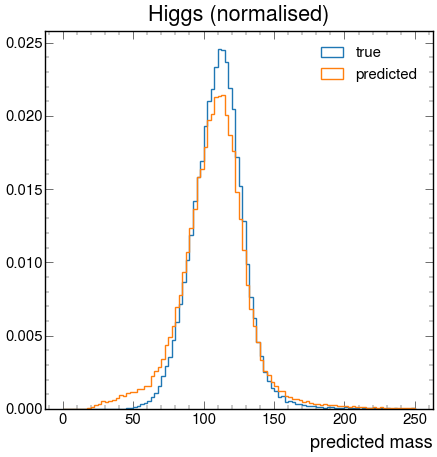

In [25]:
# Normalised with density=True
plt.hist((higgs_jet_true[:,0] + higgs_jet_true[:,1]).m,
          bins=100, histtype="step", density=True, range=(0,250), linewidth=2)

plt.hist((higgs_jet_pred[:,0] + higgs_jet_pred[:,1]).m,
         bins=100, histtype="step", density=True, range=(0,250), linewidth=2)

plt.legend(labels=["true", "predicted"])
plt.title("Higgs (normalised)", pad=15)
plt.xlabel("predicted mass", labelpad=10)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.002))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.0005))

#plt.show()
plt.rcParams['figure.facecolor'] = 'white'
plt.savefig("./efficiency_plots/h_m.png", transparent=False, dpi=300,
            bbox_inches='tight')

## Correct vs wrong by Higgs quark pt

In [164]:
H_b1_true = higgs_jet_true[:, 0]
H_b1_pred = higgs_jet_pred[:, 0]

mask = (H_b1_true == H_b1_pred) # correct b1 jets
H_b1_true_correct = H_b1_true[mask] # correctly assigned jets 
H_b1_true_wrong = H_b1_true[~mask] # the jets that we were supposed to get but didn't

H_b2_true = higgs_jet_true[:, 1]
H_b2_pred = higgs_jet_pred[:, 1]

mask = (H_b2_true == H_b2_pred) # correct b1 jets
H_b2_true_correct = H_b2_true[mask] # correctly assigned jets 
H_b2_true_wrong = H_b2_true[~mask] # the jets that we were supposed to get but didn't

In [ ]:
# Higher pt always b1 ?

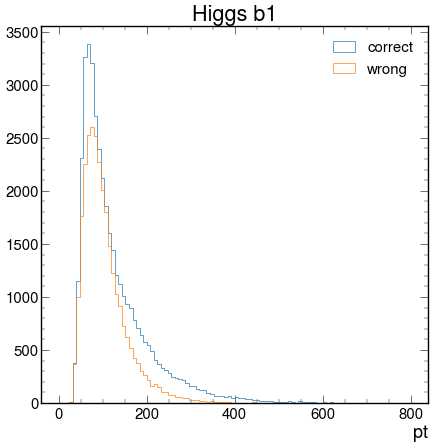

In [166]:
plt.hist(H_b1_true_correct.pt, bins=100, histtype="step", range=(0,800))
plt.hist(H_b1_true_wrong.pt, bins=100, histtype="step", range=(0,800))

plt.legend(labels=["correct", "wrong"])
plt.title("Higgs b1")
plt.xlabel("pt")
plt.show()

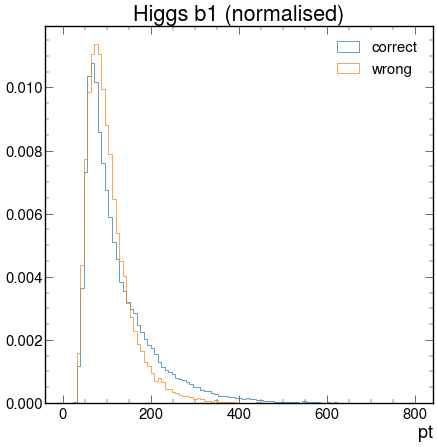

In [167]:
plt.hist(H_b1_true_correct.pt, bins=100, histtype="step", density=True, range=(0,800))
plt.hist(H_b1_true_wrong.pt, bins=100, histtype="step", density=True, range=(0,800))

plt.legend(labels=["correct", "wrong"])
plt.title("Higgs b1 (normalised)")
plt.xlabel("pt")
plt.show()

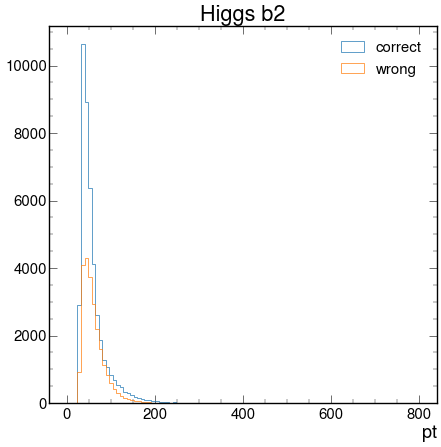

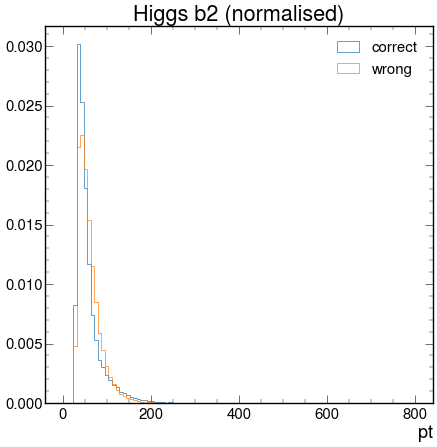

In [168]:
plt.hist(H_b2_true_correct.pt, bins=100, histtype="step", range=(0,800))
plt.hist(H_b2_true_wrong.pt, bins=100, histtype="step", range=(0,800))

plt.legend(labels=["correct", "wrong"])
plt.title("Higgs b2")
plt.xlabel("pt")
plt.show()

plt.hist(H_b2_true_correct.pt, bins=100, histtype="step", density=True, range=(0,800))
plt.hist(H_b2_true_wrong.pt, bins=100, histtype="step", density=True, range=(0,800))

plt.legend(labels=["correct", "wrong"])
plt.title("Higgs b2 (normalised)")
plt.xlabel("pt")
plt.show()